# Principal Component Analysis

### Load data

In [16]:
import pandas as pd
import numpy as np

df_hitters = pd.read_csv('data/hitters.csv')

# Dropping NAs
df_hitters.dropna(inplace=True)

In [17]:
df_hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [18]:
df_hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [19]:
df_hitters['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [20]:
df_hitters['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [21]:
df_hitters['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

### Cleaning the data

In [22]:
# Binarizing columns
# def map_binary(df, col):
#     vals = df[col].unique()
#     return df[col].apply(lambda x: 1 if x == vals[0] else 0)

# map_binary(df_hitters, 'League')
# map_binary(df_hitters, 'NewLeague')
# map_binary(df_hitters, 'Division')
# 
df_hitters.League = df_hitters.League.astype('category').cat.codes
df_hitters.NewLeague = df_hitters.NewLeague.astype('category').cat.codes
df_hitters.Division = df_hitters.Division.astype('category').cat.codes

### Get features and target

In [23]:
feature_names = df_hitters.columns.difference(['Salary'])

X = df_hitters[feature_names].astype(float).values

y = df_hitters['Salary'].values

### Stardardize features

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Train test split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Use PCA to transform data and get princial components

In [26]:
from sklearn.decomposition import PCA

n_col = X_train.shape[1] / 2

pca = PCA(n_components=n_col)

train_components = pca.fit_transform(X_train)
test_components = pca.transform(X_test)

In [44]:
# Inspect the principal axes in feature space
print X_train.shape
print train_components.shape
print pca.components_.shape

(210L, 19L)
(210L, 9L)
(9L, 19L)


In [30]:
pca.components_

array([[  7.33922745e-03,   1.85145295e-01,   3.36008029e-01,
          3.36905477e-01,   3.35835564e-01,   3.49372342e-01,
          3.46247730e-01,   3.19102624e-01,  -2.53013254e-02,
          3.29534159e-03,   1.82511115e-01,   1.98354238e-01,
         -3.47853584e-02,  -2.20743882e-02,   8.83588003e-02,
          2.21314711e-01,   1.83961529e-01,   1.92798009e-01,
          2.82660046e-01],
       [ -1.37002768e-01,  -3.81492386e-01,   1.86991507e-01,
          1.80441490e-01,   1.15909883e-01,   1.56138406e-01,
          1.70952144e-01,   1.78633694e-01,   3.27674496e-02,
         -1.54880591e-01,  -3.72073299e-01,  -2.51217970e-01,
          1.27159074e-01,   1.01794027e-01,  -2.08825037e-01,
         -3.23837913e-01,  -3.77329322e-01,  -2.47807859e-01,
          2.52611764e-01],
       [  3.84771453e-01,   1.17328883e-01,   7.04590089e-02,
          7.38795193e-02,  -1.21472562e-01,  -2.67944585e-03,
          3.01995021e-02,   9.95068060e-03,   1.47571051e-02,
          3.6032

In [31]:
pca.components_.dot(pca.components_.T).round()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [32]:
print("this is transformed X")
print(X_train.dot(pca.components_.T).round())

this is transformed X
[[-2. -2.  1. ...,  0.  1.  0.]
 [-3.  1.  0. ...,  0.  0.  0.]
 [ 0. -2.  1. ...,  0.  1.  0.]
 ..., 
 [-1. -3. -2. ...,  0.  0.  0.]
 [ 1.  1. -1. ...,  0.  0. -1.]
 [-3. -1.  0. ...,  0.  0.  1.]]


In [37]:
print 'This is M * V'
print(train_components.round())

This is M * V
[[-2. -2.  1. ...,  0.  1.  0.]
 [-3.  1.  0. ...,  0.  0.  0.]
 [ 0. -2.  1. ...,  0.  1.  0.]
 ..., 
 [-1. -3. -2. ...,  0.  0.  0.]
 [ 1.  1. -1. ...,  0.  0. -1.]
 [-3. -1.  0. ...,  0.  0.  1.]]


In [34]:
print(pca.explained_variance_)

[ 7.53129976  3.96335968  2.03352186  1.53339128  1.00452769  0.90379979
  0.65957215  0.50395911  0.26920508]


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

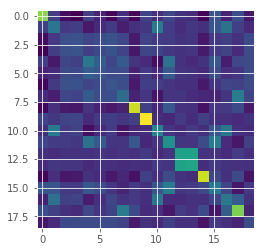

In [36]:
plt.imshow(np.cov(pca.components_.T))
plt.show()

In [41]:
np.cov(train_components.T)

array([[  7.56733469e+00,  -2.85576985e-15,   1.18990410e-15,
          1.32589314e-15,   1.10491095e-16,   2.03983561e-16,
          6.64008986e-17,   4.46214039e-17,   2.20982191e-16],
       [ -2.85576985e-15,   3.98232312e+00,   0.00000000e+00,
          2.71978081e-16,   1.18990410e-16,   2.12482876e-17,
         -4.56838182e-17,  -2.97476026e-16,   7.22441777e-16],
       [  1.18990410e-15,   0.00000000e+00,   2.04325163e+00,
         -2.80477396e-16,   1.01991780e-16,  -1.27489725e-17,
          6.79945202e-17,   1.52987670e-16,  -6.58696914e-17],
       [  1.32589314e-15,   2.71978081e-16,  -2.80477396e-16,
          1.54072808e+00,   3.08100170e-17,  -8.07434927e-17,
         -8.49931502e-18,  -1.61486985e-16,   1.23240068e-16],
       [  1.10491095e-16,   1.18990410e-16,   1.01991780e-16,
          3.08100170e-17,   1.00933404e+00,  -3.14474656e-16,
          1.99733903e-16,   4.46214039e-17,  -5.63079620e-17],
       [  2.03983561e-16,   2.12482876e-17,  -1.27489725e-17,
   

In [43]:
np.cov(train_components).shape

(210L, 210L)

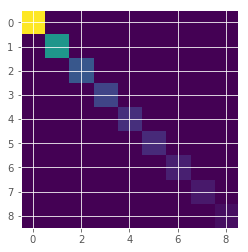

In [38]:
# visualize the covariance of transformed feature matrix
plt.imshow(np.cov(train_components.T))
plt.show()

### See how much variance the principal components explain

In [48]:
np.sum(pca.explained_variance_)

18.40263640246911

In [50]:
np.sum(pca.explained_variance_ratio_)

0.96351609069987032

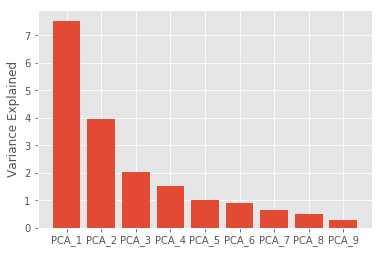

In [45]:
pca_range = np.arange(n_col) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

fig, axes = plt.subplots(1,1)
axes.bar(pca_range, pca.explained_variance_)

xticks = axes.set_xticks(pca_range)
x_tick_label = axes.set_xticklabels(pca_names)
y_label = axes.set_ylabel("Variance Explained")

### See how much (percentage of) variance the principal components explain

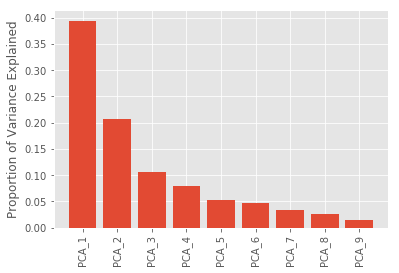

In [46]:
plt.bar(pca_range, pca.explained_variance_ratio_, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

y_label = plt.ylabel('Proportion of Variance Explained')

### See how much (percentage of) variance the principal components explain - horizontal bar chart

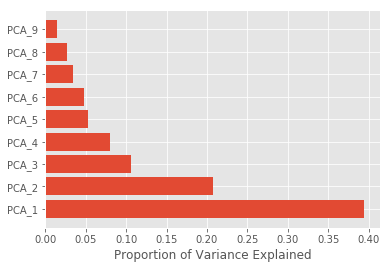

In [51]:
plt.barh(pca_range, pca.explained_variance_ratio_, align='center')
y_ticks = plt.yticks(pca_range, pca_names)
x_label = plt.xlabel('Proportion of Variance Explained')

### Get train and test error with K-Fold cross validation.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

train_mse_arr = np.array([])
test_mse_arr = np.array([])

for i in pca_range:

    train_subset = train_components[:, :i]

    pca_linear = LinearRegression()

    pca_linear.fit(train_subset, y_train)

    # Get train error
    train_mse = cross_val_score(pca_linear, train_subset, y=y_train,
                                scoring='mean_squared_error', cv=10) * -1
    
    
    train_mse_arr = np.append(train_mse_arr, train_mse.mean())
    
    # Get test error
    test_set = test_components[:, :i]
    test_mse = mean_squared_error(pca_linear.predict(test_set), y_test)
    test_mse_arr = np.append(test_mse_arr, test_mse)

G:\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
G:\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
G:\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
G:\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
G:\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Sco

### Plot train mse

# of PCs that gives lowest train MSE: 7 @ 107809.535791


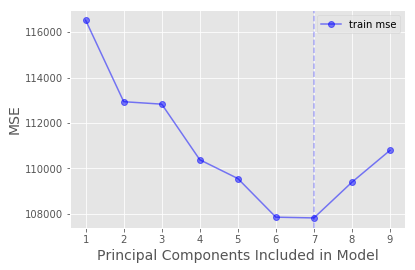

In [53]:
plt.plot(pca_range, train_mse_arr, marker='o', color='b', alpha=.5, label='train mse')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)
plt.legend(loc='best')

best_train_mse_pca, min_train_mse = np.argmin(train_mse_arr) + 1, np.min(train_mse_arr)

plt.axvline(best_train_mse_pca, color='b', ls='--', alpha=.3)

print '# of PCs that gives lowest train MSE:', best_train_mse_pca, '@', min_train_mse

### Plot test mse

# of PCs that gives lowest test MSE: 7 @ 149620.184244


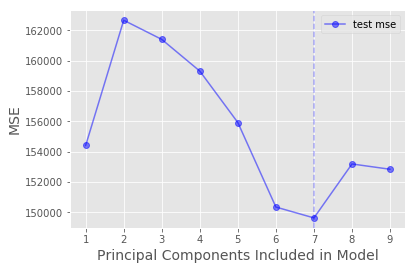

In [54]:
plt.plot(pca_range, test_mse_arr, marker='o', color='b', alpha=.5, label='test mse')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)
plt.legend(loc='best')

best_test_mse_pca, min_test_mse = np.argmin(test_mse_arr) + 1, np.min(test_mse_arr)

plt.axvline(best_test_mse_pca, color='b', ls='--', alpha=.3)

print '# of PCs that gives lowest test MSE:', best_test_mse_pca, '@', min_test_mse

### Plot train and test mse

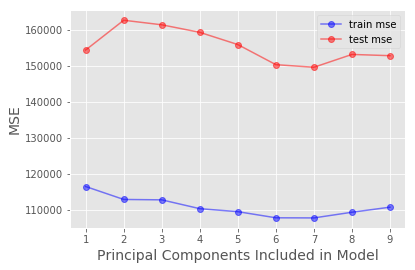

In [55]:
plt.plot(pca_range, train_mse_arr, marker='o', color='b', alpha=.5, label='train mse')
plt.plot(pca_range, test_mse_arr, marker='o', color='r', alpha=.5, label='test mse')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)
plt.legend(loc='best')